In [6]:
import pandas as pd
import numpy as np
X = np.array([[2,4],[1,3],[0,1],[-1,0.5]])
print(X)


[[ 2.   4. ]
 [ 1.   3. ]
 [ 0.   1. ]
 [-1.   0.5]]


In [7]:
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
print(X_meaned)

[[ 1.5    1.875]
 [ 0.5    0.875]
 [-0.5   -1.125]
 [-1.5   -1.625]]


In [8]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)

[[1.66666667 2.08333333]
 [2.08333333 2.72916667]]


In [9]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print("Eigen Values are", eigen_values)
print("Eigen Vectors are", eigen_vectors)

Eigen Values are [0.04791566 4.34791768]
Eigen Vectors are [[-0.78964958  0.6135581 ]
 [ 0.6135581   0.78964958]]


In [10]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print("The Sorted Eigen Values are", sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("The Sorted Eigen Vectors are", sorted_eigenvectors)

The Sorted Eigen Values are [1 0]
The Sorted Eigen Vectors are [[ 0.6135581  -0.78964958]
 [ 0.78964958  0.6135581 ]]


In [11]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset)

[[ 0.6135581  -0.78964958]
 [ 0.78964958  0.6135581 ]]


In [12]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[ 2.40093011 -0.03405292]
 [ 0.99772243  0.14203855]
 [-1.19513483 -0.29542808]
 [-2.20351772  0.18744245]]


#! PCA

In [13]:
import pandas as pd
import numpy as np
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
print(X)

[[11 33 20 41 22]
 [24 21 22 19 36]
 [33 24 40 26 10]
 [28 41 31 48 12]
 [38 19 19 36 10]
 [31 17 44 41 40]
 [23 16 14 40 46]
 [37 16 10 47 41]
 [35 31 18 40 29]
 [32 11 31 36 23]
 [19 43 33 49 18]
 [37 22 29 21 49]
 [13 24 17 30 15]
 [26 21 26 19 17]
 [42 21 17 48 27]
 [24 39 19 39 10]
 [10 45 26 38 46]
 [21 19 39 47 41]
 [20 30 48 36 13]
 [27 44 37 28 17]]


In [14]:
X_meaned = X - np.mean(X , axis = 0)
print(X_meaned)

[[-15.55   6.15  -7.     4.55  -4.1 ]
 [ -2.55  -5.85  -5.   -17.45   9.9 ]
 [  6.45  -2.85  13.   -10.45 -16.1 ]
 [  1.45  14.15   4.    11.55 -14.1 ]
 [ 11.45  -7.85  -8.    -0.45 -16.1 ]
 [  4.45  -9.85  17.     4.55  13.9 ]
 [ -3.55 -10.85 -13.     3.55  19.9 ]
 [ 10.45 -10.85 -17.    10.55  14.9 ]
 [  8.45   4.15  -9.     3.55   2.9 ]
 [  5.45 -15.85   4.    -0.45  -3.1 ]
 [ -7.55  16.15   6.    12.55  -8.1 ]
 [ 10.45  -4.85   2.   -15.45  22.9 ]
 [-13.55  -2.85 -10.    -6.45 -11.1 ]
 [ -0.55  -5.85  -1.   -17.45  -9.1 ]
 [ 15.45  -5.85 -10.    11.55   0.9 ]
 [ -2.55  12.15  -8.     2.55 -16.1 ]
 [-16.55  18.15  -1.     1.55  19.9 ]
 [ -5.55  -7.85  12.    10.55  14.9 ]
 [ -6.55   3.15  21.    -0.45 -13.1 ]
 [  0.45  17.15  10.    -8.45  -9.1 ]]


In [15]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)

[[ 84.68157895 -45.28157895 -10.31578947  -0.47105263   3.41578947]
 [-45.28157895 112.97631579  17.57894737  16.38684211 -46.03684211]
 [-10.31578947  17.57894737 113.57894737 -10.05263158 -23.26315789]
 [ -0.47105263  16.38684211 -10.05263158  94.36578947   7.32105263]
 [  3.41578947 -46.03684211 -23.26315789   7.32105263 188.93684211]]


In [16]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print("Eigen Values are", eigen_values)
print("Eigen Vectors are", eigen_vectors)

Eigen Values are [ 43.84196011  85.08225469 111.70674461 130.61479819 223.29371608]
Eigen Vectors are [[ 0.69362068  0.4036309   0.09426716  0.5571347  -0.19153872]
 [ 0.64973022 -0.12224919  0.11020961 -0.57966378  0.46341075]
 [-0.02985131  0.48127946 -0.83048346 -0.07904745  0.26744662]
 [-0.23876335  0.76832041  0.48401292 -0.34401122 -0.00797436]
 [ 0.19708365 -0.01382239 -0.2345128  -0.47853799 -0.82278315]]


In [17]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print("The Sorted Eigen Values are", sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("The Sorted Eigen Vectors are", sorted_eigenvectors)

The Sorted Eigen Values are [4 3 2 1 0]
The Sorted Eigen Vectors are [[-0.19153872  0.5571347   0.09426716  0.4036309   0.69362068]
 [ 0.46341075 -0.57966378  0.11020961 -0.12224919  0.64973022]
 [ 0.26744662 -0.07904745 -0.83048346  0.48127946 -0.02985131]
 [-0.00797436 -0.34401122  0.48401292  0.76832041 -0.23876335]
 [-0.82278315 -0.47853799 -0.2345128  -0.01382239  0.19708365]]


In [18]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset)

[[-0.19153872  0.5571347 ]
 [ 0.46341075 -0.57966378]
 [ 0.26744662 -0.07904745]
 [-0.00797436 -0.34401122]
 [-0.82278315 -0.47853799]]


In [19]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[  7.29340443 -11.27829001]
 [-11.56616288   3.63104646]
 [ 14.25080144  15.51732269]
 [ 18.85845601  -4.93653083]
 [  5.27993154  19.4211993 ]
 [-12.34331978  -1.37179804]
 [-24.22654389  -5.40500523]
 [-23.91977717   2.69568182]
 [ -4.51674724   0.40461056]
 [ -4.76494368  13.54613808]
 [ 17.09934595 -14.48340476]
 [-22.43275882   2.83178536]
 [  7.7844904    2.42398508]
 [  4.75342602  13.52134793]
 [ -9.17730094   8.38522498]
 [ 17.20576549  -1.00399579]
 [ -5.07232069 -29.71855291]
 [-11.7089735  -10.24984068]
 [ 19.11274919  -0.71151683]
 [ 18.0904781   -3.21940717]]


knn

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import math
import operator
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv(url, names=names)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
def euclideanDistance(data1, data2, length):
  distance = 0
  for x in range(length):
    distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [3]:
def knn(trainingSet, testInstance, k):
  distances = {}
  sort = {}
  length = testInstance.shape[1]
#### Start of STEP 3
# Calculating euclidean distance between each row of training data and test
  for x in range(len(trainingSet)):
#### Start of STEP 3.1
    dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
    distances[x] = dist[0]
#### End of STEP 3.1
#### Start of STEP 3.2
# Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
#### End of STEP 3.2
    neighbors = []
#### Start of STEP 3.3
# Extracting top k neighbors
  for x in range(k):
    neighbors.append(sorted_d[x][0])
#### End of STEP 3.3
    classVotes = {}
#### Start of STEP 3.4
# Calculating the most freq class in the neighbors
  for x in range(len(neighbors)):
    response = trainingSet.iloc[neighbors[x]][-1]
    if response in classVotes:
      classVotes[response] += 1
    else:
      classVotes[response] = 1
#### End of STEP 3.4
#### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1))
    return(sortedVotes[0][0], neighbors)
#### End of STEP 3.5

In [4]:
###Creating a dummy test dataset 
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [5]:
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)
# Predicted class
print(result)

Iris-virginica


In [6]:
print(neigh)

[109]


In [7]:
k = 3
# Running KNN model
result,neigh = knn(data, test, k)
# Predicted class
print(result)

Iris-virginica


In [8]:
k = 5
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)
# Predicted class
print(result)

Iris-virginica


In [9]:
print(neigh)

[109, 125, 129, 107, 102]


Linear regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [15]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:

data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [17]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


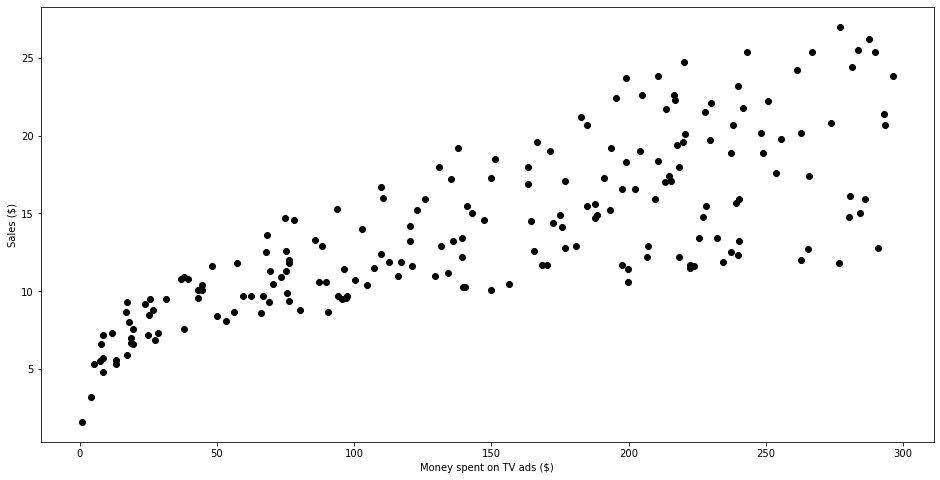

In [18]:
plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['sales'],
 c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [19]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
print("Slope: ",reg.coef_[0][0])
print("Intercept: ",reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

Slope:  0.04569799030469652
Intercept:  7.210566360628155
The linear model is: Y = 7.2106 + 0.045698X


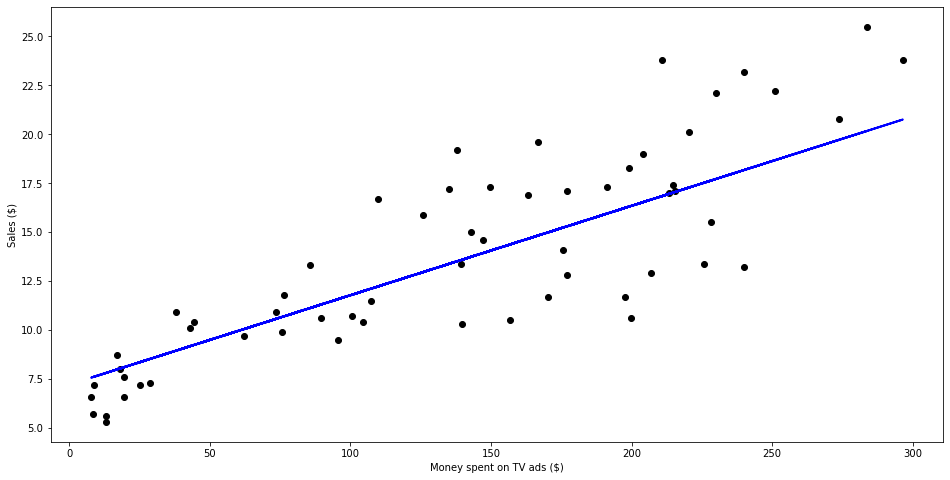

In [21]:
predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
 x_test,
 y_test,
 c='black'
)
plt.plot(
 x_test,
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  2.8425439018968004


In [23]:
r2 = r2_score(y_test,predictions)
print("R2 = ",r2)

R2 =  0.6943235878651415
